In [26]:
import matplotlib.pyplot as plt
%matplotlib inline  
plt.rcParams['figure.figsize'] = (10, 6)
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score, f1_score
import warnings
import pandas as pd
import sklearn
from sklearn.linear_model import LinearRegression

In [27]:
warnings.filterwarnings('ignore')
df=pd.read_csv('data cleaning new1.csv',index_col=0) 
df.head()


,Street,Num of rooms,Floor,Price,Bars,Furniture,Elevator,Terrace,Parking,Size of house per mm,Numbers_for_Type_house_in_df,Numbers_for_Cities_in_df
0,משה שרת,5.0,1,3120000.0,2,1,2,1,2,114.0,1,1
1,יד שלום,4.0,1,4480000.0,1,1,1,2,2,140.0,2,1
2,פיקוס 5,6.0,0,2250000.0,2,1,1,2,2,180.0,2,2
3,שלם,3.0,1,2150000.0,1,1,1,1,1,80.0,1,1
4,הפלמ''ח,3.0,2,2500000.0,2,2,1,2,2,100.0,1,3


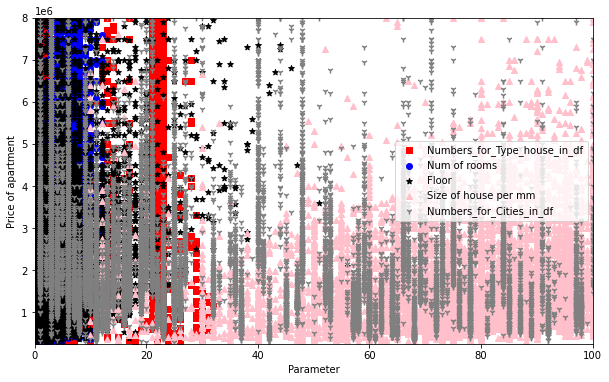

In [28]:
plt.scatter(x=df['Numbers_for_Type_house_in_df'],y=df['Price'],c='r',marker='s',label='Numbers_for_Type_house_in_df')
plt.scatter(x=df['Num of rooms'],y=df['Price'],c='b',marker='o',label='Num of rooms')
plt.scatter(x=df['Floor'],y=df['Price'],c='k',marker='*',label='Floor')#plt.scatter(x=df['Size of house per mm'],y=df['Price'],color=,marker='*',label='Floor')
plt.scatter(x=df['Size of house per mm'],y=df['Price'],color='pink',marker="^",label='Size of house per mm')
plt.scatter(x=df['Numbers_for_Cities_in_df'],y=df['Price'],color='grey',marker="1",label='Numbers_for_Cities_in_df')
#plt.scatter(x=df['Floor'],y=df['Price'],c='k',marker='*',label='Floor')
plt.axis([0, 100, 250000, 8000000])
plt.legend(numpoints=1,loc=5)
plt.xlabel('Parameter')
plt.ylabel('Price of apartment')
plt.show()

In [29]:
lr = linear_model.LinearRegression() # create a linear regression object

x = df[["Num of rooms","Floor" ,"Bars","Furniture","Elevator","Terrace","Parking","Size of house per mm","Numbers_for_Type_house_in_df", "Numbers_for_Cities_in_df"]]
y = df['Price']
lr.fit(X=x, y=y);
print("Slope:",lr.coef_)
print("Intercept:",lr.intercept_)


Slope: [ 4.03047996e+05  3.10782286e+04 -3.01436008e+05  8.30553010e+04
  1.93998108e+05  2.18174790e+05  2.82326640e+04  2.64936526e+01
  7.42285842e+04 -2.54771249e+03]
Intercept: -42513.25869554281


In [30]:
print("R2:",lr.score(x,y))
print("R2:",r2_score(y,lr.predict(x.values)))

R2: 0.2854972439781627
R2: 0.2854972439781627


In [31]:
#lr = linear_model.LinearRegression() # create a linear regression object

#df["Num of roomsxFloorxType housexNumbers_for_Cities_in_df"]=df["Num of rooms"]*df["Floor"]*df["Numbers_for_Type_house_in_df"]*df["Numbers_for_Cities_in_df"]
#df["Num of roomsxNumbers_for_Cities_in_df"]=df["Num of rooms"]*df["Numbers_for_Cities_in_df"]
#df["Num of roomsxFloorxNumbers_for_Cities_in_df"]=df["Num of rooms"]*df["Floor"]*df["Numbers_for_Cities_in_df"]
#df["Num of roomsxFloorxNumbers_for_Cities_in_dfxSize_of_house_per_mm"]=df["Num of rooms"]*df["Floor"]*df["Size of house per mm"]*df["Numbers_for_Cities_in_df"]
#df["Size_of_house_per_mmxParking"]=df["Size of house per mm"]*df["Parking"]
#df["FloorxSize_of_house_per_mmxTerracexElevator"]=df["Floor"]*df["Size of house per mm"]*df["Terrace"]*df["Elevator"]
#df["BarsxFurniturexElevatorxTerracexParking"]=df["Bars"]*df["Furniture"]*df["Elevator"]*df["Terrace"]*df["Parking"]

#x = df[["Num of rooms","Floor" ,"Bars","Furniture","Elevator","Terrace","Parking","Size of house per mm","Numbers_for_Type_house_in_df", "Numbers_for_Cities_in_df","Num of roomsxNumbers_for_Cities_in_df", "Num of roomsxFloorxType housexNumbers_for_Cities_in_df","Num of roomsxFloorxNumbers_for_Cities_in_df","Num of roomsxFloorxNumbers_for_Cities_in_dfxSize_of_house_per_mm","Size_of_house_per_mmxParking","FloorxSize_of_house_per_mmxTerracexElevator","BarsxFurniturexElevatorxTerracexParking"]].values.reshape(df[["Num of rooms","Floor" ,"Bars","Furniture","Elevator","Terrace","Parking","Size of house per mm","Numbers_for_Type_house_in_df", "Numbers_for_Cities_in_df","Num of roomsxNumbers_for_Cities_in_df", "Num of roomsxFloorxType housexNumbers_for_Cities_in_df","Num of roomsxFloorxNumbers_for_Cities_in_df","Num of roomsxFloorxNumbers_for_Cities_in_dfxSize_of_house_per_mm","Size_of_house_per_mmxParking","FloorxSize_of_house_per_mmxTerracexElevator","BarsxFurniturexElevatorxTerracexParking"]].shape[0],17)
#y = df['Price'].values.reshape(df['Price'].shape[0],1)

#lr.fit(X=x, y=y)

#print('/n')
#print("Slope:",lr.coef_)
#print("Intercept:",lr.intercept_)
#print("R2:",lr.score(x,y))
#df

In [32]:
X = df[df.columns[(df.columns != 'Street') & (df.columns != 'Price')]]
y = df['Price']
print(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.45, random_state=40)
model = sklearn.linear_model.LinearRegression().fit(X_train, y_train)
size = float(input("Please enter size of apartment: "))
city = float(input("Please enter number of city between 1-741: "))
rooms = float(input("Please enter number of rooms: "))
Floor = float(input("Please enter number of floor: "))
Bars = float(input("Please enter 2 if the apartment include bars or 1 if not: "))
Furniture = float(input("Please enter 2 if the apartment include Furniture or 1 if not: "))
Elevator = float(input("Please enter 2 if the apartment include Elevator or 1 if not: "))
Terrace = float(input("Please enter 2 if the apartment include Terrace or 1 if not: "))
Parking = float(input("Please enter 2 if the apartment include Parking or 1 if not: "))
Numbers_for_Type_house = float(input("Please enter number of type house between 1-32:: "))

while (1 <=city <= 741 and 1 <= Bars <= 2 and 1 <= Furniture <= 2 and 1 <= Elevator <= 2 and 1 <= Terrace <= 2 and 1 <= Parking <= 2 and 0 <= Numbers_for_Type_house <= 32):
    print('Closest price prediction : {:.1f}'.format(model.predict([[rooms,Floor,Bars,Furniture,Elevator,Terrace,Parking,size,Numbers_for_Type_house,city]])[0]))
    size = float(input("Please enter size of apartment: "))
    city = float(input("Please enter number of city between 1-741: "))
    rooms = float(input("Please enter number of rooms: "))
    Floor = float(input("Please enter number of floor: "))
    Bars = float(input("Please enter 2 if the apartment include bars or 1 if not: "))
    Furniture = float(input("Please enter 2 if the apartment include Furniture or 1 if not: "))
    Elevator = float(input("Please enter 2 if the apartment include Elevator or 1 if not: "))
    Terrace = float(input("Please enter 2 if the apartment include Terrace or 1 if not: "))
    Parking = float(input("Please enter 2 if the apartment include Parking or 1 if not: "))
    Numbers_for_Type_house = float(input("Please enter number of type house between 1-32:: "))
print('Input is out of range!')

       Num of rooms  Floor  Bars  Furniture  Elevator  Terrace  Parking  \
0               5.0      1     2          1         2        1        2   
1               4.0      1     1          1         1        2        2   
2               6.0      0     2          1         1        2        2   
3               3.0      1     1          1         1        1        1   
4               3.0      2     2          2         1        2        2   
...             ...    ...   ...        ...       ...      ...      ...   
36978           5.0      3     1          1         1        2        2   
36979           5.0      8     1          2         2        2        2   
36980           3.0      2     2          2         1        1        1   
36981           6.0      4     2          1         2        2        2   
36982           4.0     18     1          2         2        2        2   

       Size of house per mm  Numbers_for_Type_house_in_df  \
0                     114.0           

KeyboardInterrupt: Interrupted by user